# Fare Play: An Unraveling of the Mystery of Flight Prices

by: Mark Dunlea Tate, Landry Houston, Anthony Amadasun

---

## 3.1 Introduction

In this notebook, we employ a Random Forest Regressor model to predict flight price and a Random Forest Classifier model to predict the cardinal direction of flights. The goal is to develop a robust model capable of accurately predicting price and determining flight directions.

---

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

Read and assign data set.

In [18]:
df = pd.read_csv('../data/encoded_dataset.csv')
df.head()

,flight,stops,class,duration,price,duration_range,departure_time_encoded,duration_range_encoded,airline_Air_India,airline_GO_FIRST,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,SG-8709,0,0,130,71.44,Short,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,SG-8157,0,0,140,71.44,Short,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,I5-764,0,0,130,71.47,Short,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,UK-995,0,0,135,71.46,Short,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,UK-963,0,0,140,71.46,Short,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1


---

## 3.2 Regression Modeling

In [19]:
X = df.drop(columns=["flight", "price", "duration_range"])
y = df["price"]

In [20]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

### Linear Regression

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
print(f"Training Score: {lr.score(X_train, y_train):.4f}")
print(f"Testing Score: {lr.score(X_test, y_test):.4f}")

lr_y_pred = lr.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, lr_y_pred))}")

Training Score: 0.9417
Testing Score: 0.9408
RMSE Score: 66.27496071729996


Interpretation:

The provided results suggest that the model performs well on both the training and testing sets, indicating that the model explains a significant portion of the variability in flight prices based on the selected features. The Training Score of 0.9417 shows that the model fits the training data well and the Testing Score of 0.9408 shows that the model generalizes well to new, unseen data. The lower RMSE score of 66.27 indicates that the model predictions are close to the actual prices and suggest that the selected features, preprocessing, and cleaning methods contribute to accurate predictions of flight prices.

### Random Forest Regressor

In [24]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

Print out train and test scores as well as RMSE.

In [25]:
print(f"Training Score: {rf.score(X_train, y_train):.4f}")
print(f"Testing Score: {rf.score(X_test, y_test):.4f}")

rf_y_pred = rf.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, rf_y_pred))}")

Training Score: 0.9793
Testing Score: 0.9754
RMSE Score: 42.74837031232066


Interpretation

The provided results suggest that the Random Forest model performs well in terms of both the training and testing sets, indicating that the model explains a significant portion of the variability in flight prices based on the selected features. The Training Score of 0.9793 shows that the model fits the training data well and the Testing Score of 0.9754 shows that the model generalizes well to new, unseen data. The lower RMSE score of 42.75 indicates that the model predictions are close to the actual prices and suggest that the selected features, preprocessing, and cleaning methods contribute to accurate predictions of flight prices.

### Decision Tree Regressor

In [26]:
dt = DecisionTreeRegressor(max_depth=7, min_samples_split=2, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5)

In [27]:
print(f"Training Score: {dt.score(X_train, y_train):.4f}")
print(f"Testing Score: {dt.score(X_test, y_test):.4f}")

dt_y_pred = dt.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, dt_y_pred))}")

Training Score: 0.9443
Testing Score: 0.9428
RMSE Score: 65.15962052644102


Interpretation

The provided results suggest that the Decision Tree model performs well in terms of both the training and testing sets, indicating that the model explains a significant portion of the variability in flight prices based on the selected features. The Training Score of 0.9443 shows that the model fits the training data well and the Testing Score of 0.9428 shows that the model generalizes well to new, unseen data. The lower RMSE score of 65.15 indicates that the model predictions are close to the actual prices and suggest that the selected features, preprocessing, and cleaning methods contribute to accurate predictions of flight prices.

In [28]:
gb = XGBRegressor()
gb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
print(f"Training Score: {gb.score(X_train, y_train):.4f}")
print(f"Testing Score: {gb.score(X_test, y_test):.4f}")

gb_y_pred = gb.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, gb_y_pred))}")

Training Score: 0.9699
Testing Score: 0.9680
RMSE Score: 48.713480653172944


The provided results suggest that the Gradient Boost model performs well in terms of both the training and testing sets, indicating that the model explains a significant portion of the variability in flight prices based on the selected features. The Training Score of 0.9699 shows that the model fits the training data well and the Testing Score of 0.9680 shows that the model generalizes well to new, unseen data. The lower RMSE score of 48.71 indicates that the model predictions are close to the actual prices and suggest that the selected features, preprocessing, and cleaning methods contribute to accurate predictions of flight prices.

---

## Random Forest Classifier

In this notebook, we employ a Random Forest Classifier to predict the cardinal direction of flights. The goal is to develop a robust model capable of accurately determining flight directions. Through feature importance analysis, we identify arrival time, departure time, and ticket price as crucial predictors. Fine-tuning the model using Grid Search reveals optimal hyperparameters below. The model's effectiveness is evaluated with an accuracy score, reaching a noteworthy 0.8994 on the test set. This notebook provides a comprehensive exploration of the classification modeling process, emphasizing feature selection, model tuning, and insights into the predictive capabilities of the Random Forest Classifier for flight direction prediction.

In [4]:
df = pd.read_csv("../data/feature_eng_data.csv")
df.head()

,airline,flight,origin,departure_time,stops,arrival_time,destination,class,duration,price,duration_range,departure_time_encoded,duration_range_encoded,origin_lat_long,destination_lat_long,card_direction,origin_latitude,origin_longitude,destination_latitude,destination_longitude
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,130,71.44,Short,2,0,"(28.6139, 77.209)","(19.076, 72.8777)",W,28.6139,77.209,19.076,72.8777
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,140,71.44,Short,1,0,"(28.6139, 77.209)","(19.076, 72.8777)",W,28.6139,77.209,19.076,72.8777
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,130,71.47,Short,1,0,"(28.6139, 77.209)","(19.076, 72.8777)",W,28.6139,77.209,19.076,72.8777
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,135,71.46,Short,4,0,"(28.6139, 77.209)","(19.076, 72.8777)",W,28.6139,77.209,19.076,72.8777
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,140,71.46,Short,4,0,"(28.6139, 77.209)","(19.076, 72.8777)",W,28.6139,77.209,19.076,72.8777


### Only including flights out of a specific airport

In [6]:
df = df.groupby("origin").get_group("Hyderabad")

In [7]:
X = pd.concat(
    [
        df[["stops", "class", "price"]],
        df["departure_time"].map(
            {
                "Early_Morning": 0,
                "Morning": 1,
                "Afternoon": 2,
                "Evening": 3,
                "Night": 4,
                "Late_Night": 5,
            }
        ),
        df["arrival_time"].map(
            {
                "Early_Morning": 0,
                "Morning": 1,
                "Afternoon": 2,
                "Evening": 3,
                "Night": 4,
                "Late_Night": 5,
            }
        ),
        pd.get_dummies(df["airline"], dtype=int),
    ],
    axis=1,
)
y = df["card_direction"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### RFC using all columns

In [9]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score is {accuracy}")

Accuracy Score is 0.9204851752021563


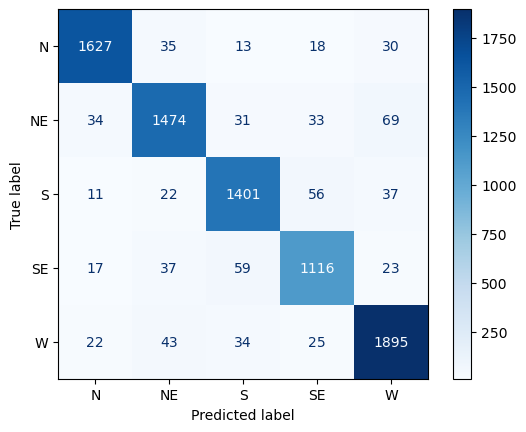

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    conf_matrix, display_labels=np.unique(np.concatenate((y_test, y_pred)))
)

disp.plot(cmap="Blues", values_format="d");

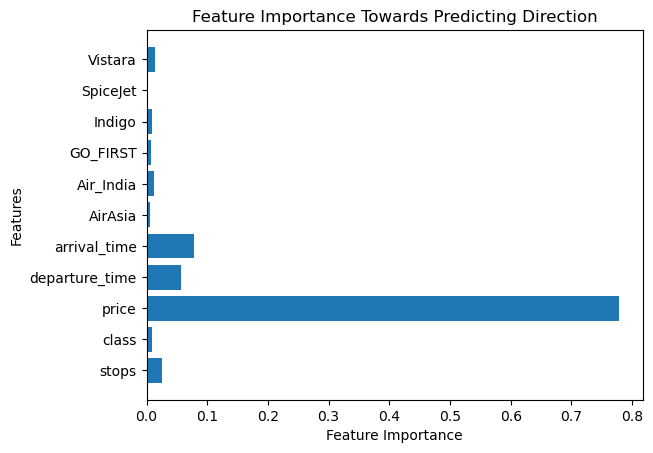

In [12]:
feature_importances = rfc.feature_importances_
features = X_train.columns  # replace with your feature names

plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Towards Predicting Direction")
plt.show()

In [13]:
X_new = X[["arrival_time", "departure_time", "price"]]
y = y

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

In [15]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score is {accuracy}")

Accuracy Score is 0.8990443518745406


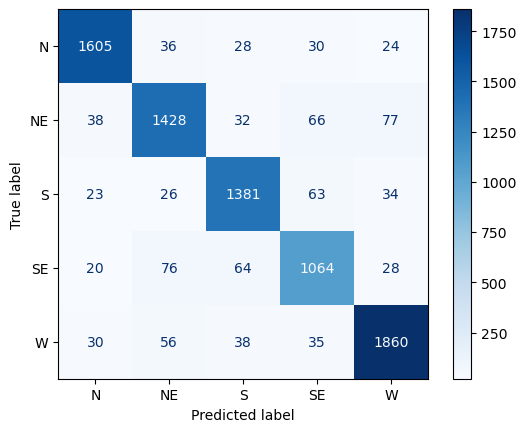

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    conf_matrix, display_labels=np.unique(np.concatenate((y_test, y_pred)))
)

disp.plot(cmap="Blues", values_format="d");

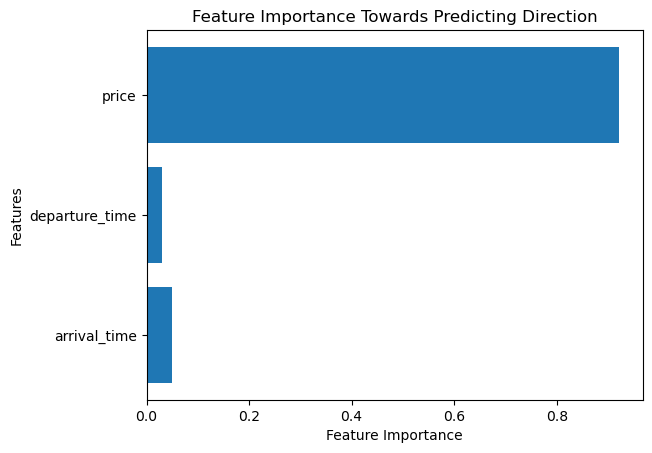

<Figure size 640x480 with 0 Axes>

In [25]:
feature_importances = rfc.feature_importances_
features = X_train.columns  # replace with your feature names

plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Towards Predicting Direction")
plt.show()
plt.savefig("../images/class_feature.png", bbox_inches="tight")

### RFC Gridsearch to improve Accuracy score

In [20]:
pipe = Pipeline(steps=[("rfc", RandomForestClassifier(random_state=42))])

param_grid = {
    "rfc__n_estimators": [155, 160, 165],
    "rfc__max_depth": [30],
    "rfc__min_samples_split": [2],
    "rfc__min_samples_leaf": [1],
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rfc__max_depth': [30], 'rfc__min_samples_leaf': [1],
                         'rfc__min_samples_split': [2],
                         'rfc__n_estimators': [155, 160, 165]},
             scoring='accuracy')

In [21]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the classifier with the best parameters
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy Score: {accuracy}")

Best Parameters: {'rfc__max_depth': 30, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 160}
Best Accuracy Score: 0.8994119088458711


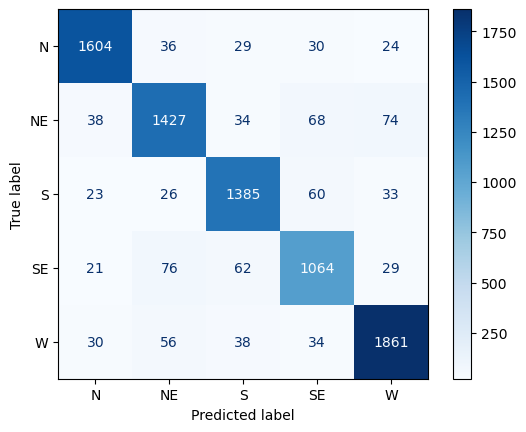

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    conf_matrix, display_labels=np.unique(np.concatenate((y_test, y_pred)))
)

disp.plot(cmap="Blues", values_format="d")
plt.savefig("../images/class_matrix.png", bbox_inches="tight")

Through feature importance analysis, we identify arrival time, departure time, and ticket price as crucial predictors. Fine-tuning the model using Grid Search reveals optimal hyperparameters below. The model's effectiveness is evaluated with an accuracy score, reaching a noteworthy 0.8994 on the test set. This notebook provides a comprehensive exploration of the classification modeling process, emphasizing feature selection, model tuning, and insights into the predictive capabilities of the Random Forest Classifier for flight direction prediction.



---

## 3.3 Model Visualization

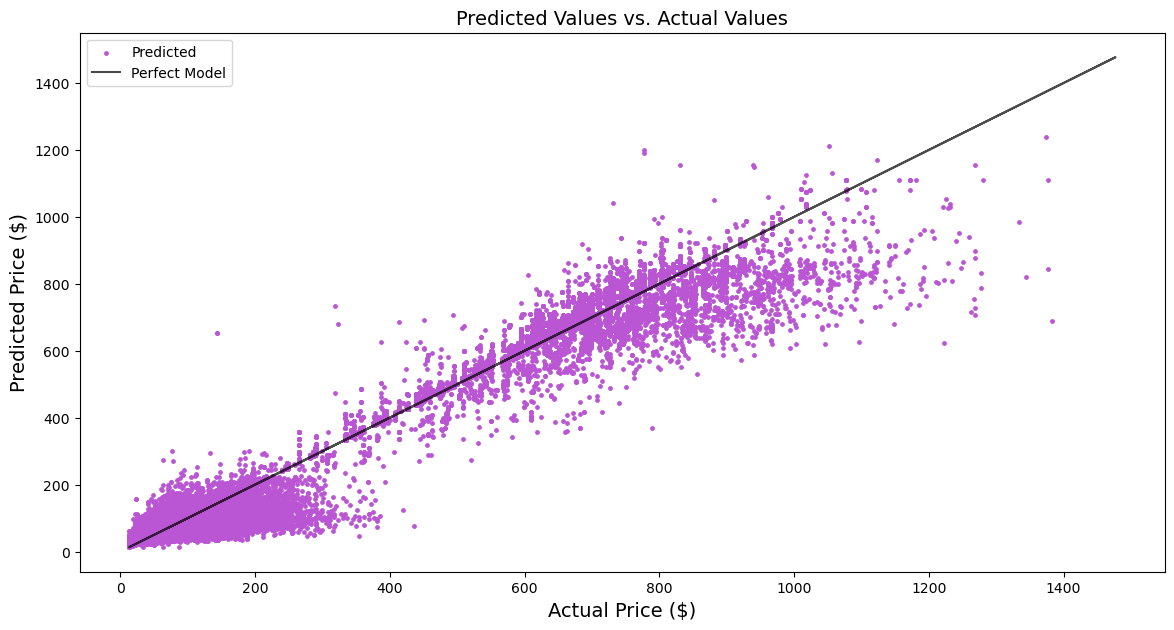

In [30]:
plt.figure(figsize=(14, 7))
plt.scatter(
    y_test,
    rf_y_pred,
    color="MediumOrchid",
    s=6,
    label="Predicted",
)
plt.title("Predicted Values vs. Actual Values", size=14)
plt.xlabel("Actual Price ($)", size=14)
plt.ylabel("Predicted Price ($)", size=14)
plt.plot(df["price"], y, color="black", alpha=0.7, label="Perfect Model")
plt.legend(loc="upper left")
plt.savefig("../images/residuals_scatterplot.png", bbox_inches="tight")

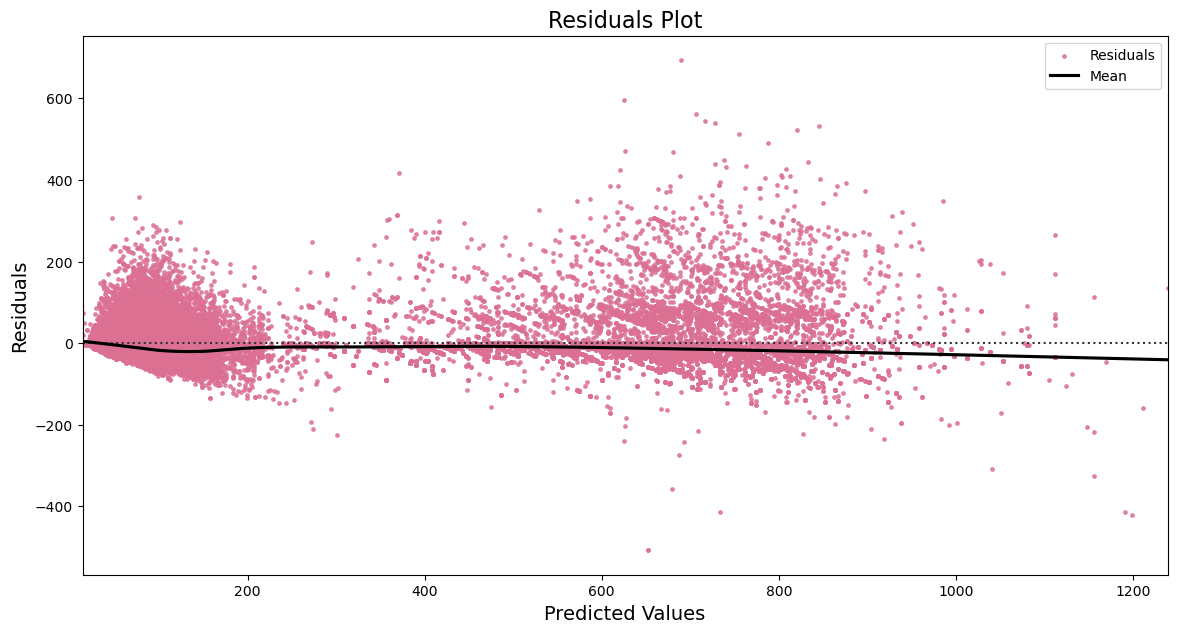

In [31]:
plt.figure(figsize=(14, 7))
sns.residplot(
    x=rf_y_pred,
    y=y_test,
    lowess=True,
    color="PaleVioletRed",
    line_kws=dict(color="black", label="Mean"),
    label="Residuals",
    scatter_kws={"s": 6},
)
plt.title("Residuals Plot", size=16)
plt.xlabel("Predicted Values", size=14)
plt.ylabel("Residuals", size=14)
plt.legend()
plt.savefig("../images/residuals_residplot.png", bbox_inches="tight")

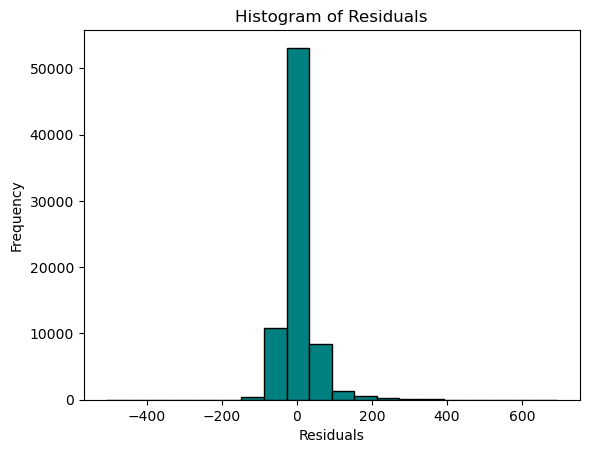

In [32]:
plt.hist((y_test - rf_y_pred), bins=20, edgecolor='black', color='teal')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.savefig("../images/residuals_histogram.png", bbox_inches="tight")

---

## 3.4 Conclusion

Optimal model (Random Forest):

- Training Score: 0.9793
- Testing Score: 0.9754
- RMSE Score: 42.75

The training and testing scores for the Random Forest model indicate that the model performs well on the specific dataset used for training and testing.